In [1]:
%pylab inline

import sys
sys.path.append('../src/')
import leapfrog_bfe 
from gala import potential as gp
from astropy import units as u
import scipy.linalg as la 
import gala.dynamics as gd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from profiles import Hernquist 

from gala.units import galactic

In [23]:
hernquist_halo = Hernquist(1E12*u.Msun, 5*u.kpc, 5*u.kpc)

acc = hernquist_halo.acc([10, 30, 1]*u.kpc)

In [24]:
acc

[<Quantity -1012.6670694 km2 / (kpc s2)>,
 <Quantity -3038.00120821 km2 / (kpc s2)>,
 <Quantity -101.26670694 km2 / (kpc s2)>]

In [25]:
pot.acceleration([10, 30, 1]).to(u.km**2 / (u.kpc * u.s**2))

<Quantity [[-1012.6670694 ],
           [-3038.00120821],
           [ -101.26670694]] km2 / (kpc s2)>

In [18]:

orbit_hern = leapfrog_bfe.integrate_hern(20, 0, 0,
                                         0, -200, 0, 
                                         5, 1E12*u.Msun, 5)

In [12]:
t_orb = orbit_hern[0]
x_orb = orbit_hern[1]
y_orb = orbit_hern[2]
z_orb = orbit_hern[3]
vx_orb = orbit_hern[4]
vy_orb = orbit_hern[5]
vz_orb = orbit_hern[6]

In [14]:
# Gala
pot = gp.HernquistPotential(m=1E12*u.Msun, c=5, units=galactic)

In [40]:
ics = gd.PhaseSpacePosition(pos=[20,0,0.] * u.kpc,
                            vel=[0,-200,0] * u.kpc/u.Gyr)
orbit = gp.Hamiltonian(pot).integrate_orbit(ics, dt=0.001*u.Gyr, n_steps=5000-1)

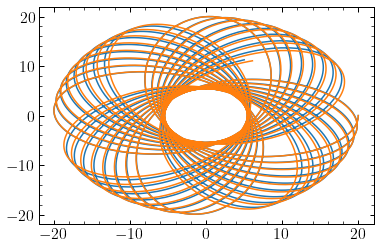

In [42]:
plot(x_orb, y_orb)
plot(orbit.x, orbit.y)